# **Innovage Projekt 427**
## Kostensimulation zum Projekt "Psychotheraphie für Geflüchtete / ESTAIRconnect"
---
#### Comment:
Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed eiusmod tempor incidunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquid ex ea commodi consequat. Quis aute iure reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint obcaecat cupiditat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum ...

<br>
+ Autor: Daniel Benninger (Innovage)

#### History:
- V3 20.10.25 - added first KPI examples
- V2 19.10.25 - initial simulation, linegraphs / faked cost
- V1 15.10.25 - initial draft
---




### Setup Program / Load Libraries

In [77]:
import pandas as pd
import numpy as np

import io

import matplotlib.pyplot as plt
import seaborn as sns

---
### Definiere Hilfsfunktionen zur Handhabung von Dataframes für Therapeuten, Patienten und Sitzungen (seesions)

In [78]:
def InitDataFrame(AnzZeilen: int, Spalten: []) -> pd.DataFrame:
    """
    xxxxx

    Args:
        Spalten für das neue DataFrame  (bspw. TypA' und 'TypB').
        AnzZeilen des DataFrames
        Die Zellen werden per default mit Nullen (0) initialisiert

    Returns:
        pd.DataFrame: Das initialisierte DataFrame.
    """

    # Erstelle ein 2D-NumPy-Array mit Anzahl Zeilen und Typ A/B Spalten, gefüllt mit Nullen
    daten = np.zeros((AnzZeilen, len(Spalten)))

    # Erstelle das Therapeut DataFrame aus dem NumPy-Array
    dfNew = pd.DataFrame(data=daten, columns=Spalten)

    return dfNew

In [79]:
def AddTherapeut(dfTherapeut: pd.DataFrame, AnzNeu: int, Typ: str, StartWeek: int) -> pd.DataFrame:
    """
    Inkrementiert die Werte in der Spalte Typ  des DataFrames
    dfTherapeut ab dem Index (StartWeek - 1) bis zum Ende des DataFrames
    um den Wert AnzNeu.

    Args:
        dfTherapeut (pd.DataFrame): Das DataFrame mit den Spalten 'TypA' und 'TypB'.
        AnzNeu (int): Der Wert, um den die Zellen inkrementiert werden.
        StartWeek (int): Die Startwoche (entspricht dem Index StartWeek - 1).

    Returns:
        pd.DataFrame: Das aktualisierte DataFrame.
    """

    # 1. Start-Index berechnen
    start_index = StartWeek - 1

    # 2. End-Index bestimmen
    end_index = dfTherapeut.index.max()

    # Prüfen, ob der Start-Index innerhalb der Grenzen des DataFrames liegt
    if start_index > end_index or start_index < 0:
        print(f"⚠️ Warnung: StartWeek ({StartWeek}) liegt außerhalb des gültigen Indexbereichs (1 bis {end_index + 1}). Es wurden keine Änderungen vorgenommen.")
        return dfTherapeut

    # 3. Den relevanten Bereich auswählen
    # Wir verwenden .loc, um Zeilen (ab start_index) auszuwählen
    # Inkrementiere die Werte in Spalte Typ
    dfTherapeut.loc[start_index:, Typ] += AnzNeu

    return dfTherapeut

In [80]:
def DelTherapeut(dfTherapeut: pd.DataFrame, AnzDel: int, Typ: str, StartWeek: int) -> pd.DataFrame:
    """
    Dekrementiert die Werte in den Spalten Typ des DataFrames
    dfTherapeut ab dem Index (StartWeek - 1) bis zum Ende des DataFrames
    um den Wert AnzNeu.

    Args:
        dfTherapeut (pd.DataFrame): Das DataFrame mit den Spalten 'TypA' und 'TypB'.
        AnzNeu (int): Der Wert, um den die Zellen dekrementiert werden.
        StartWeek (int): Die Startwoche (entspricht dem Index StartWeek - 1).

    Returns:
        pd.DataFrame: Das aktualisierte DataFrame.
    """

    # 1. Start-Index berechnen
    start_index = StartWeek - 1

    # 2. End-Index bestimmen
    end_index = dfTherapeut.index.max()

    # Prüfen, ob der Start-Index innerhalb der Grenzen des DataFrames liegt
    if start_index > end_index or start_index < 0:
        print(f"⚠️ Warnung: StartWeek ({StartWeek}) liegt außerhalb des gültigen Indexbereichs (1 bis {end_index + 1}). Es wurden keine Änderungen vorgenommen.")
        return dfTherapeut

    # 3. Den relevanten Bereich auswählen
    # Wir verwenden .loc, um sowohl Zeilen (ab start_index) als auch die Spalten ('TypA', 'TypB') auszuwählen.

    # Inkrementiere die Werte in Spalte Typ
    dfTherapeut.loc[start_index:, Typ] -= AnzDel

    return dfTherapeut

In [81]:
def AddPatient(dfPatient: pd.DataFrame, AnzNeu: float, Typ: str, StartWeek: int) -> pd.DataFrame:
    """
    Inkrementiert die Werte in der Spalte Typ  des DataFrames
    dfPatient ab dem Index (StartWeek - 1) bis zum Ende des DataFrames
    um den Wert AnzNeu.

    Args:
        dfPatient (pd.DataFrame): Das DataFrame mit den Spalten 'TypA' und 'TypB'.
        AnzNeu (int): Der Wert, um den die Zellen inkrementiert werden.
        StartWeek (int): Die Startwoche (entspricht dem Index StartWeek - 1).

    Returns:
        pd.DataFrame: Das aktualisierte DataFrame.
    """

    # 1. Start-Index berechnen
    start_index = StartWeek - 1

    # 2. End-Index bestimmen
    end_index = dfPatient.index.max()

    # Prüfen, ob der Start-Index innerhalb der Grenzen des DataFrames liegt
    if start_index > end_index or start_index < 0:
        print(f"⚠️ Warnung: StartWeek ({StartWeek}) liegt außerhalb des gültigen Indexbereichs (1 bis {end_index + 1}). Es wurden keine Änderungen vorgenommen.")
        return dfPatient

    # 3. Den relevanten Bereich auswählen
    # Wir verwenden .loc, um Zeilen (ab start_index) auszuwählen
    # Inkrementiere die Werte in Spalte Typ
    dfPatient.loc[start_index:, Typ] += AnzNeu

    return dfPatient

In [82]:
def DelPatient(dfPatient: pd.DataFrame, AnzDel: float, Typ: str, StartWeek: int) -> pd.DataFrame:
    """
    Dekrementiert die Werte in den Spalten Typ des DataFrames
    dfPatient ab dem Index (StartWeek - 1) bis zum Ende des DataFrames
    um den Wert AnzNeu.

    Args:
        dfPatient (pd.DataFrame): Das DataFrame mit den Spalten 'TypA' und 'TypB'.
        AnzNeu (int): Der Wert, um den die Zellen dekrementiert werden.
        StartWeek (int): Die Startwoche (entspricht dem Index StartWeek - 1).

    Returns:
        pd.DataFrame: Das aktualisierte DataFrame.
    """

    # 1. Start-Index berechnen
    start_index = StartWeek - 1

    # 2. End-Index bestimmen
    end_index = dfPatient.index.max()

    # Prüfen, ob der Start-Index innerhalb der Grenzen des DataFrames liegt
    if start_index > end_index or start_index < 0:
        print(f"⚠️ Warnung: StartWeek ({StartWeek}) liegt außerhalb des gültigen Indexbereichs (1 bis {end_index + 1}). Es wurden keine Änderungen vorgenommen.")
        return dfTherapeut

    # 3. Den relevanten Bereich auswählen
    # Wir verwenden .loc, um sowohl Zeilen (ab start_index) als auch die Spalten ('TypA', 'TypB') auszuwählen.

    # Inkrementiere die Werte in Spalte Typ
    dfPatient.loc[start_index:, Typ] -= AnzDel

    return dfPatient

In [83]:
def AddSession (dfSession: pd.DataFrame, AnzNeu: int, Typ: str, StartWeek: int) -> pd.DataFrame:
    """
    Inkrementiert die Werte in der Spalte Typ  des DataFrames
    dfSession ab dem Index (StartWeek - 1) bis zum Ende des DataFrames
    um den Wert AnzNeu.

    Args:
        dfSession (pd.DataFrame): Das DataFrame mit den Spalten 'TypA' und 'TypB'.
        AnzNeu (int): Der Wert, um den die Zellen inkrementiert werden.
        StartWeek (int): Die Startwoche (entspricht dem Index StartWeek - 1).

    Returns:
        pd.DataFrame: Das aktualisierte DataFrame.
    """

    # 1. Start-Index berechnen
    start_index = StartWeek - 1

    # 2. End-Index bestimmen
    end_index = dfSession.index.max()

    # Prüfen, ob der Start-Index innerhalb der Grenzen des DataFrames liegt
    if start_index > end_index or start_index < 0:
        print(f"⚠️ Warnung: StartWeek ({StartWeek}) liegt außerhalb des gültigen Indexbereichs (1 bis {end_index + 1}). Es wurden keine Änderungen vorgenommen.")
        return dfSession

    # 3. Den relevanten Bereich auswählen
    # Wir verwenden .loc, um Zeilen (ab start_index) auszuwählen
    # Inkrementiere die Werte in Spalte Typ
    dfSession.loc[start_index:, Typ] += AnzNeu

    return dfSession

In [84]:
def Add_Zero_Columns(df: pd.DataFrame, new_columns: list) -> pd.DataFrame:
    """
    Erweitert ein bestehendes DataFrame um die in new_columns angegebenen Spalten
    und initialisiert deren Werte mit Nullen.

    Args:
        df (pd.DataFrame): Das zu erweiternde DataFrame.
        new_columns (list): Eine Liste der Namen der neuen Spalten.

    Returns:
        pd.DataFrame: Das erweiterte DataFrame.
    """

    # 1. Die Länge des DataFrames (Anzahl der Zeilen, m) bestimmen
    num_rows = len(df)

    # 2. Iteriere über die Liste der neuen Spaltennamen
    for col_name in new_columns:
        # Füge die neue Spalte hinzu und initialisiere sie mit Nullen.
       df[col_name] = np.zeros(num_rows)

    return df

In [85]:
def Add_Session_Columns(df: pd.DataFrame, AnzNew: int, StartWeek: int, MaxSession: int) -> pd.DataFrame:
    """
    Erweitert ein bestehendes DataFrame um AnzNew Spalten mit Nullen
    und initialisiert die neuen Session Spalten mit (max AnzSession) Einsen ab der Position StartWeek.

    Args:
        df (pd.DataFrame): Das zu erweiternde DataFrame.
        AnzNew (int): Die Anzahl der neuen Spalten.
        StartWeek (int): Die Startwoche der neuen Session Spalten.
        MaxSession (int): Die maximale Anzahl an Sessions proPatient

    Returns:
        pd.DataFrame: Das erweiterte DataFrame.
    """

    anzahl_sessions = MaxSession
    anzahl_spalten = AnzNew

    start_index = StartWeek
    end_index = start_index + anzahl_sessions - 1

    if end_index > len(df):
        end_index = len(df)

    for i in range(1, anzahl_spalten+1):
        spalten_name = str(StartWeek) + "_" + str(i)
        df = Add_Zero_Columns(df, [spalten_name])
        df.loc[start_index:end_index, spalten_name] = 1

    return df

In [86]:
# Testing Session Dataframe Initialization
spalten = ["Total"]
anz_rows = 104
dfX = InitDataFrame(anz_rows, spalten)
print(dfX)
dfX = Add_Session_Columns(dfX, AnzNew=3, StartWeek=11, MaxSession=35)
print(dfX)
dfX['Total'] = dfX.drop(columns=['Total']).sum(axis=1)
# print(dfX)

     Total
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
..     ...
99     0.0
100    0.0
101    0.0
102    0.0
103    0.0

[104 rows x 1 columns]
     Total  11_1  11_2  11_3
0      0.0   0.0   0.0   0.0
1      0.0   0.0   0.0   0.0
2      0.0   0.0   0.0   0.0
3      0.0   0.0   0.0   0.0
4      0.0   0.0   0.0   0.0
..     ...   ...   ...   ...
99     0.0   0.0   0.0   0.0
100    0.0   0.0   0.0   0.0
101    0.0   0.0   0.0   0.0
102    0.0   0.0   0.0   0.0
103    0.0   0.0   0.0   0.0

[104 rows x 4 columns]


---  
## Simulation Parameter and Tools

In [87]:
# Definiere die Anzahl der Wochen (als Zeitreihe der Simulation)
anzahl_zeilen = 104          # Anzahl Wochen für die Simulation

In [88]:
# Definiere die Spaltennamen
spaltenAB  = ["TypA", "TypB"]  # Typen der Therapeuten (Varianten für die Kostensimulation)
spaltenTot = ["Total"]         # Totalisierungsspalte in Sessions

# Erstelle das Therapeut DataFrame
dfTherapeut = InitDataFrame(anzahl_zeilen, spaltenAB)

# Erstelle das Patient DataFrame
dfPatient = InitDataFrame(anzahl_zeilen, spaltenAB)

# Erstelle das Cost DataFrame
dfCost = InitDataFrame(anzahl_zeilen, spaltenAB)

# Erstelle das Income DataFrame
dfIncome = InitDataFrame(anzahl_zeilen, spaltenAB)

# Erstelle das initiale Session DataFrame für TypA und Typ B, mit der Totalisierungsspalte an erster Stelle
dfSessionA = InitDataFrame(anzahl_zeilen, spaltenTot)
dfSessionB = InitDataFrame(anzahl_zeilen, spaltenTot)


## Simulation Szenario(s)

### 0. Define **Helper Functions** for Scenario Simuations

In [89]:
def Config_Therapeut_or_Patient (dfOp: pd.DataFrame, dfToP: pd.DataFrame) -> pd.DataFrame:
    """
    Geht jede Zeile des Operations-DataFrames durch und aktualisiert dfToP (Therapeut or Patient) entsprechend.

    Args:
        dfOp  (pd.DataFrame): DataFrame mit den Operationen.
        dfToP (pd.DataFrame): DataFrame, das aktualisiert werden soll.

    Returns:
        pd.DataFrame: Aktualisiertes DataFrame
    """

    print(f"\n Starte Abarbeitung von {len(dfOp)} Operationen auf dfToP (Länge: {len(dfToP)}).")

    # Durchlaufe jede Zeile von dfOp
    for index, row in dfOp.iterrows():
        typ    = row['Typ']
        op     = row['Op']
        anzahl = row['Anzahl']
        week   = row['Week']

        # Bestimme die Zielspalte in dfToP
        # Angenommen, Typ A -> Spalte TypA, Typ B -> Spalte TypB, etc.
        column = f"Typ{typ}"

        print(f"-> Verarbeite Zeile {index} (Typ: {typ}, Op: {op}, Anzahl: {anzahl}, Week: {week}):")

        if column not in dfToP.columns:
            print(f"   Fehler: Zielspalte {column} existiert nicht in dfToP.")
            continue

        # Rufe die passende funktion (ADD or DEL) zum Therapeut dataframe auf
        if op == "ADD":
          dfToP  = AddTherapeut(dfToP, anzahl, column, week)
        if op == "DEL":
          dfToP  = DelTherapeut(dfToP, anzahl, column, week)

    return dfToP

In [90]:
def Config_Sessions (dfOp: pd.DataFrame, dfSession: pd.DataFrame, typAB: str) -> pd.DataFrame:
    """
    Geht jede Zeile des Operations-DataFrames durch und aktualisiert dfToP (Therapeut or Patient) entsprechend.
    Am Schluss wird die "Total" Spalte aktualisiert.

    Args:
        dfOp  (pd.DataFrame): DataFrame mit den Operationen.
        dfSession (pd.DataFrame): DataFrame, das aktualisiert werden soll.
        typ (str): Typ des Therapeuten (A oder B)

    Returns:
        pd.DataFrame: Aktualisiertes DataFrame
    """

    print(f"\n Starte Abarbeitung von {len(dfOp)} Operationen auf dfSession (Länge: {len(dfSession)}).")

    # Durchlaufe jede Zeile von dfOp
    for index, row in dfOp.iterrows():
        typ    = row['Typ']
        op     = row['Op']
        anzahl = row['Anzahl']
        week   = row['Week']


        # Verabeite die Parameter gemäss passendem typ
        if typ == typAB and op == "ADD":
          print(f"-> Verarbeite Zeile {index} (Typ: {typ}, Op: {op}, Anzahl: {anzahl}, Week: {week}):")
          dfSession = Add_Session_Columns(dfSession, AnzNew=anzahl, StartWeek=week, MaxSession=35)

    # Refresh the "Total" Column Values in the Dataframe
    dfSession['Total'] = dfSession.drop(columns=['Total']).sum(axis=1)

    return dfSession

In [91]:
def Read_Scenario(data_file: str, data_sheet: str) -> pd.DataFrame:
    """
    Liest Szenariodaten für Therapeuten oder Patienten aus einer Excel-Datei.

    Args:
        data_file (str) : Der Pfad zur Excel-Datei.
        data_sheet (str): Der Name des Arbeitsblatts in der Excel-Datei.

    Returns:
        pd.DataFrame: Das DataFrame mit den gelesenen Szenariodaten.
    """

    dfSzenario = pd.read_excel(
        data_file,
        sheet_name=data_sheet,
        dtype={'Typ': str, 'Op': str, 'Anzahl': int, 'Week': int}
    )
    return dfSzenario

### 1. Read **Scenario Data** for Therapeut and Patient Evolution over time

In [92]:
# Define the URL of the Excel file on GitHub
# >>> Use raw content URL
excel_url = 'https://github.com/sawubona-repo/Innovage427/raw/main/Data/427-Kostensimuation-Szenarien.xlsx'
sheet_therapeut = 'Therapeut'
sheet_patient   = 'Patient'

# Read the Excel file into a DataFrame using the Read_Scenario function
dfSzenarioT = Read_Scenario(excel_url, sheet_therapeut)
dfSzenarioP = Read_Scenario(excel_url, sheet_patient)

print("--- Initialized DataFrames from Excel file ---")
print("DataFrame dfSzenarioT:")
print(dfSzenarioT)
print("\nDataFrame dfSzenarioP:")
print(dfSzenarioP)

--- Initialized DataFrames from Excel file ---
DataFrame dfSzenarioT:
  Typ   Op  Anzahl  Week
0   A  ADD       3     2
1   A  ADD       5    11
2   B  ADD       5    11
3   A  DEL       2    35
4   B  ADD       3    21
5   B  ADD       5    30
6   B  DEL       3    25

DataFrame dfSzenarioP:
   Typ   Op  Anzahl  Week
0    A  ADD       3     5
1    A  ADD       5    15
2    B  ADD       5     3
3    B  ADD       7    13
4    B  ADD       5    23
5    A  ADD       7    25
6    B  ADD       5    33
7    B  ADD       5    43
8    A  ADD      11    35
9    A  ADD       7    45
10   B  ADD       5    53
11   A  ADD       5    75
12   B  ADD      13    83


### 2. Create **Scenario Data Objects** for Therapeut, Patient and Session Evolution over time

In [93]:
# Config Therapeut and Patient Dataframes according the "Therapeut and Patient Evolution" scenario given by dataframe dfSzenarioT and dfSzenarioP
dfTx = Config_Therapeut_or_Patient(dfSzenarioT, dfTherapeut)
dfPx = Config_Therapeut_or_Patient(dfSzenarioP, dfPatient)


 Starte Abarbeitung von 7 Operationen auf dfToP (Länge: 104).
-> Verarbeite Zeile 0 (Typ: A, Op: ADD, Anzahl: 3, Week: 2):
-> Verarbeite Zeile 1 (Typ: A, Op: ADD, Anzahl: 5, Week: 11):
-> Verarbeite Zeile 2 (Typ: B, Op: ADD, Anzahl: 5, Week: 11):
-> Verarbeite Zeile 3 (Typ: A, Op: DEL, Anzahl: 2, Week: 35):
-> Verarbeite Zeile 4 (Typ: B, Op: ADD, Anzahl: 3, Week: 21):
-> Verarbeite Zeile 5 (Typ: B, Op: ADD, Anzahl: 5, Week: 30):
-> Verarbeite Zeile 6 (Typ: B, Op: DEL, Anzahl: 3, Week: 25):

 Starte Abarbeitung von 13 Operationen auf dfToP (Länge: 104).
-> Verarbeite Zeile 0 (Typ: A, Op: ADD, Anzahl: 3, Week: 5):
-> Verarbeite Zeile 1 (Typ: A, Op: ADD, Anzahl: 5, Week: 15):
-> Verarbeite Zeile 2 (Typ: B, Op: ADD, Anzahl: 5, Week: 3):
-> Verarbeite Zeile 3 (Typ: B, Op: ADD, Anzahl: 7, Week: 13):
-> Verarbeite Zeile 4 (Typ: B, Op: ADD, Anzahl: 5, Week: 23):
-> Verarbeite Zeile 5 (Typ: A, Op: ADD, Anzahl: 7, Week: 25):
-> Verarbeite Zeile 6 (Typ: B, Op: ADD, Anzahl: 5, Week: 33):
-> Verar

In [119]:
dfTx.describe()
dfPx.describe()

,TypA,TypB
count,104.000000,104.000000
mean,25.480769,26.730769
std,13.294996,13.097269
min,0.000000,0.000000
25%,15.000000,17.000000
50%,33.000000,29.500000
75%,38.000000,32.000000
max,38.000000,45.000000


In [94]:
# Config Session Dataframes for TypA and TypB according the "Patient Evolution" scenario given by dataframe dfSzenarioP
dfSAx = Config_Sessions(dfSzenarioP, dfSessionA, "A")
dfSBx = Config_Sessions(dfSzenarioP, dfSessionB, "B")


 Starte Abarbeitung von 13 Operationen auf dfSession (Länge: 104).
-> Verarbeite Zeile 0 (Typ: A, Op: ADD, Anzahl: 3, Week: 5):
-> Verarbeite Zeile 1 (Typ: A, Op: ADD, Anzahl: 5, Week: 15):
-> Verarbeite Zeile 5 (Typ: A, Op: ADD, Anzahl: 7, Week: 25):
-> Verarbeite Zeile 8 (Typ: A, Op: ADD, Anzahl: 11, Week: 35):
-> Verarbeite Zeile 9 (Typ: A, Op: ADD, Anzahl: 7, Week: 45):
-> Verarbeite Zeile 11 (Typ: A, Op: ADD, Anzahl: 5, Week: 75):

 Starte Abarbeitung von 13 Operationen auf dfSession (Länge: 104).
-> Verarbeite Zeile 2 (Typ: B, Op: ADD, Anzahl: 5, Week: 3):
-> Verarbeite Zeile 3 (Typ: B, Op: ADD, Anzahl: 7, Week: 13):
-> Verarbeite Zeile 4 (Typ: B, Op: ADD, Anzahl: 5, Week: 23):
-> Verarbeite Zeile 6 (Typ: B, Op: ADD, Anzahl: 5, Week: 33):
-> Verarbeite Zeile 7 (Typ: B, Op: ADD, Anzahl: 5, Week: 43):
-> Verarbeite Zeile 10 (Typ: B, Op: ADD, Anzahl: 5, Week: 53):
-> Verarbeite Zeile 12 (Typ: B, Op: ADD, Anzahl: 13, Week: 83):


In [ ]:
dfSAx.describe()
dfSBx.describe()

### 3. **Visualize Scenario** using Scenario Data Objects Evolution over time

---  
## Visualizations

Linegraphs of Therapeuts, Patients and Sessions (over the week series)

In [126]:
def Plot_LineGraph_of_Dataframe(df: pd.DataFrame, title: str, xlabel: str, ylabel: str, legFlag: bool = True) -> plt.Figure:
  # Plot a line graph of Sessions with all columns
  df.plot(kind='line', linestyle='--', figsize=(15, 5), legend=legFlag )

  # Set the number of ticks for the x-axis
  plt.locator_params(axis='x', nbins=7)
  plt.locator_params(axis='y', nbins=5)

  # Add title and labels
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  # Position the legend in the center of the x-axis
  plt.legend(loc='best', fontsize=8)

  # Return the figure object instead of showing it
  # return ax.figure
  plt.show()

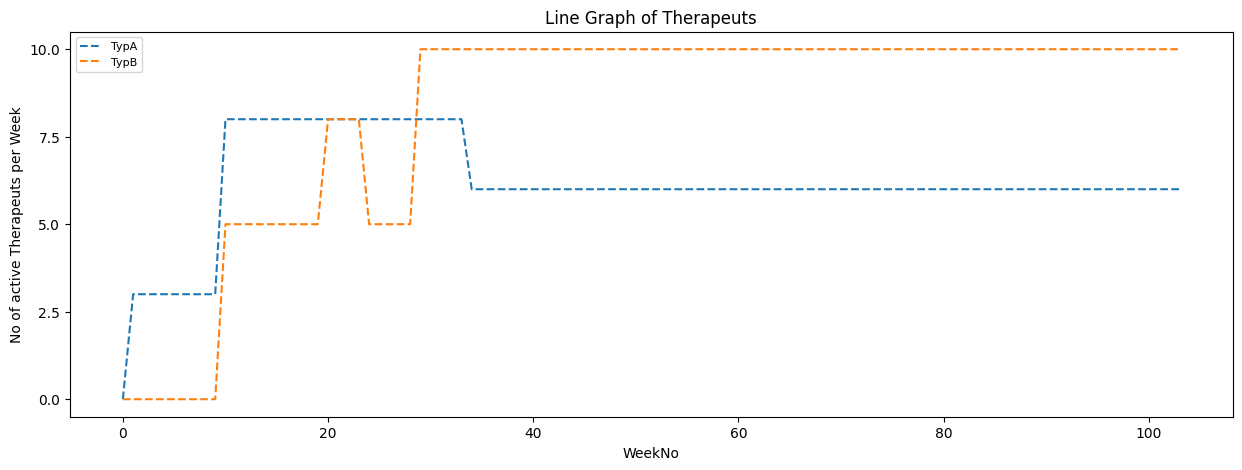

In [127]:
Plot_LineGraph_of_Dataframe(dfTx, "Line Graph of Therapeuts", "WeekNo", "No of active Therapeuts per Week")

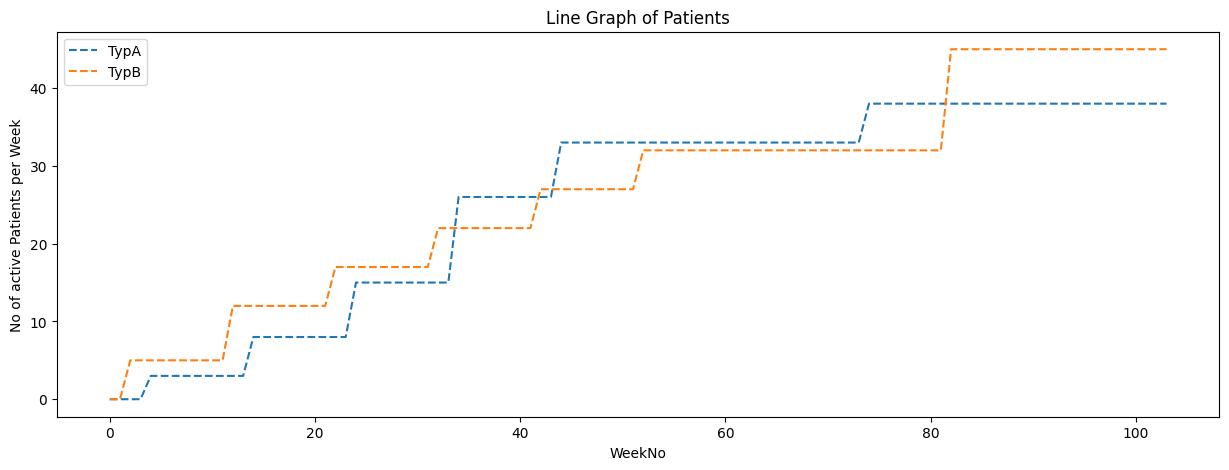

In [97]:
Plot_LineGraph_of_Dataframe(dfPx, "Line Graph of Patients", "WeekNo", "No of active Patients per Week")

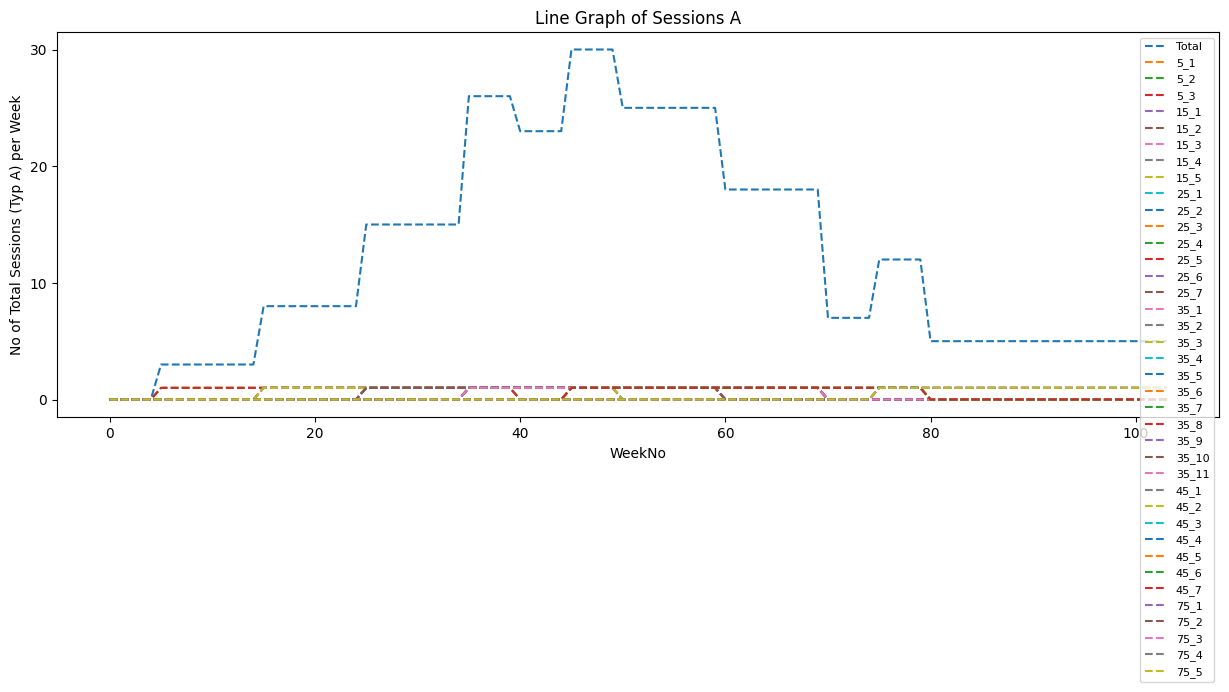

In [128]:
Plot_LineGraph_of_Dataframe(dfSAx, "Line Graph of Sessions A", "WeekNo", "No of Total Sessions (Typ A) per Week", legFlag = True)

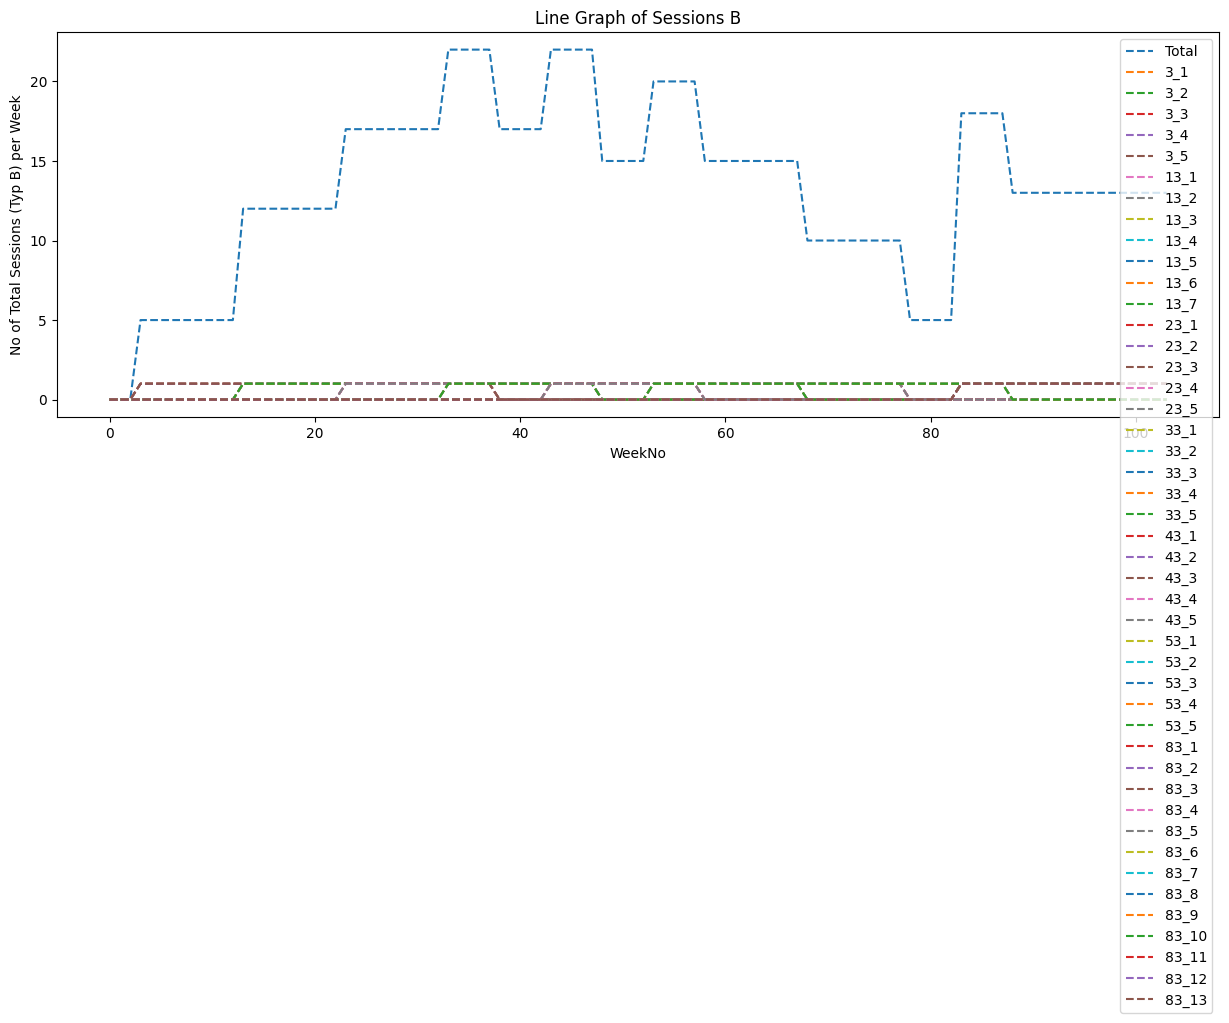

In [99]:
Plot_LineGraph_of_Dataframe(dfSBx, "Line Graph of Sessions B", "WeekNo", "No of Total Sessions (Typ B) per Week")

In [100]:
dfCost = InitDataFrame(anzahl_zeilen, spaltenAB)

In [101]:
dfCost['TypA'] = dfSAx['Total'] * -155
dfCost['TypB'] = dfSBx['Total'] * 85
# dfCost.head(20)

In [102]:
# dfCost['TypACum'] = dfCost['TypA'].cumsum()
# dfCost['TypBCum'] = dfCost['TypB'].cumsum()
dfCost['Total'] = dfCost['TypA'] + dfCost['TypB']
dfCost['TotalCum'] = dfCost['TypA'].cumsum() + dfCost['TypB'].cumsum()

# dfCost.head(20)



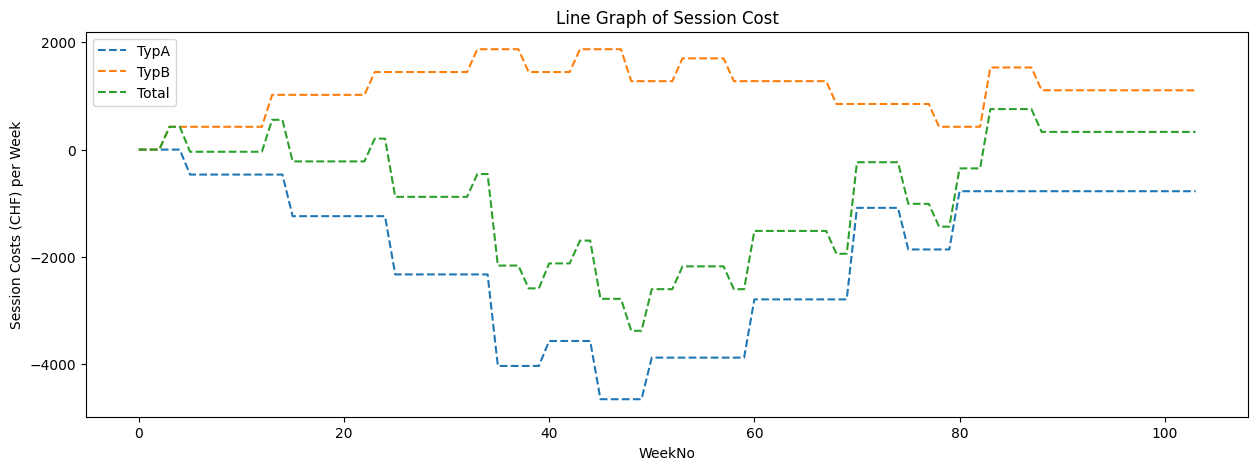

In [104]:
Plot_LineGraph_of_Dataframe(dfCost[['TypA','TypB','Total']], "Line Graph of Session Cost", "WeekNo", "Session Costs (CHF) per Week")

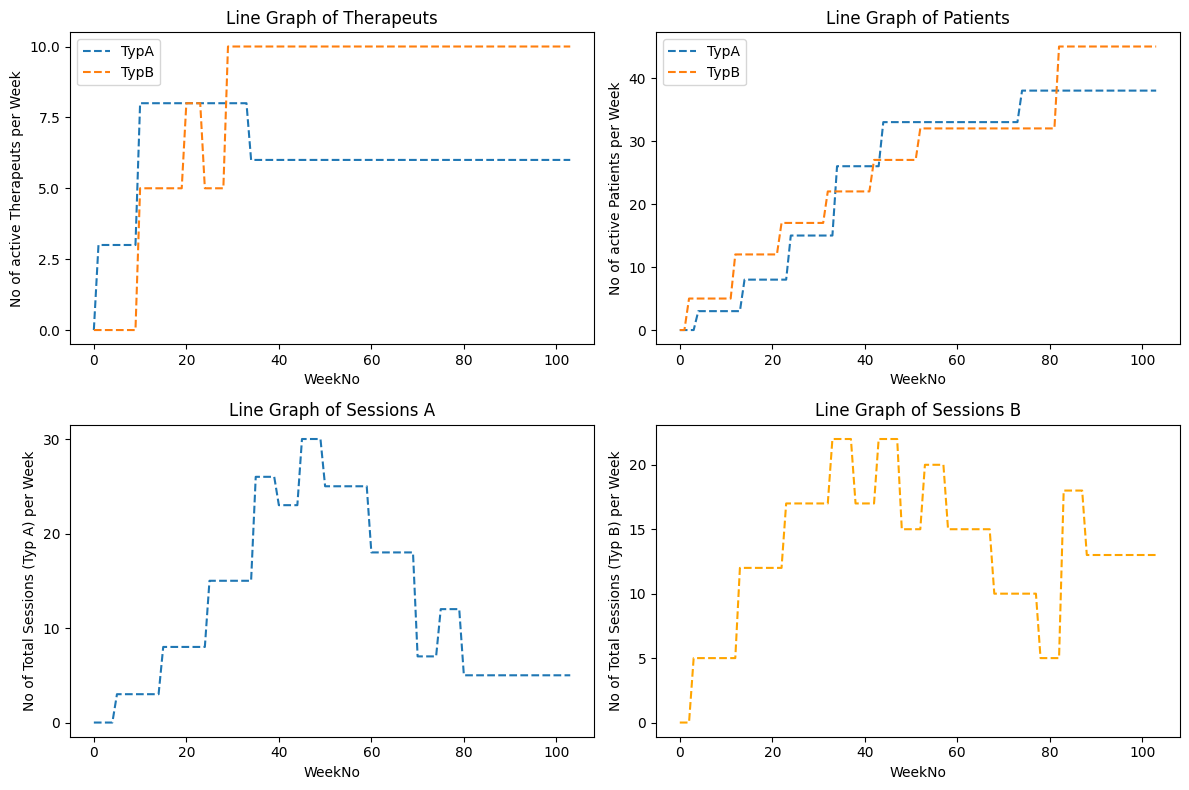

In [105]:
import matplotlib.pyplot as plt
# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot dfTx on the first subplot
dfTx.plot(ax=axes[0, 0], kind='line', linestyle='--')
axes[0, 0].set_title("Line Graph of Therapeuts")
axes[0, 0].set_xlabel('WeekNo')
axes[0, 0].set_ylabel('No of active Therapeuts per Week')
axes[0, 0].locator_params(axis='x', nbins=10)
axes[0, 0].locator_params(axis='y', nbins=5)


# Plot dfPx on the second subplot
dfPx.plot(ax=axes[0, 1], kind='line', linestyle='--')
axes[0, 1].set_title('Line Graph of Patients')
axes[0, 1].set_xlabel('WeekNo')
axes[0, 1].set_ylabel('No of active Patients per Week')
axes[0, 1].locator_params(axis='x', nbins=10)
axes[0, 1].locator_params(axis='y', nbins=5)


# Plot dfSAx on the third subplot
dfSAx['Total'].plot(ax=axes[1, 0], kind='line', linestyle='--')
axes[1, 0].set_title('Line Graph of Sessions A')
axes[1, 0].set_xlabel('WeekNo')
axes[1, 0].set_ylabel('No of Total Sessions (Typ A) per Week')
axes[1, 0].locator_params(axis='x', nbins=10)
axes[1, 0].locator_params(axis='y', nbins=5)


# Plot dfSBx on the fourth subplot
dfSBx['Total'].plot(ax=axes[1, 1], kind='line', linestyle='--', color='orange')
axes[1, 1].set_title('Line Graph of Sessions B')
axes[1, 1].set_xlabel('WeekNo')
axes[1, 1].set_ylabel('No of Total Sessions (Typ B) per Week')
axes[1, 1].locator_params(axis='x', nbins=10)
axes[1, 1].locator_params(axis='y', nbins=5)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

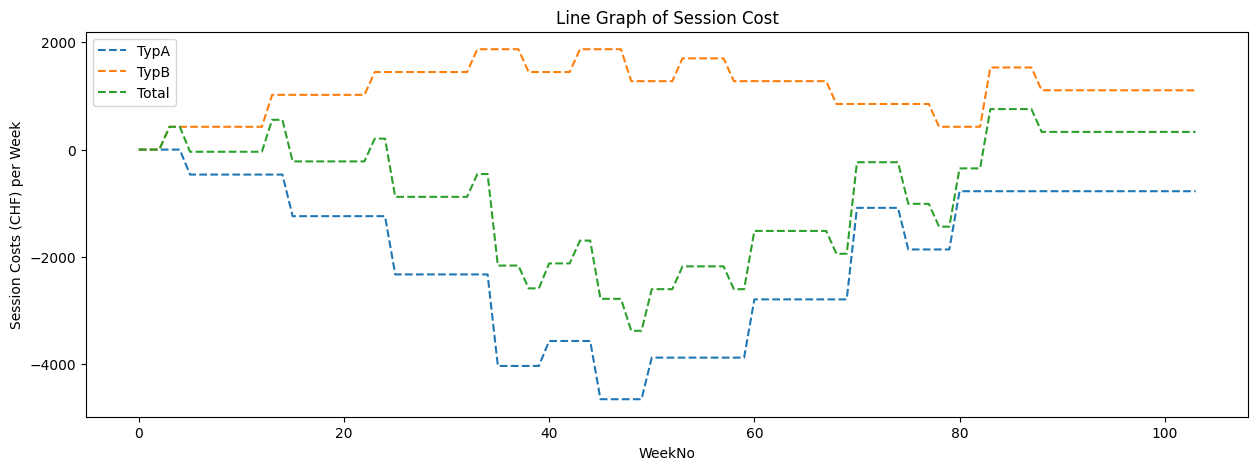

In [106]:
Plot_LineGraph_of_Dataframe(dfCost[['TypA','TypB','Total']], "Line Graph of Session Cost", "WeekNo", "Session Costs (CHF) per Week")

---
---
## Dashboard Like KPI Calculations

In [112]:
dfTherapeutKPI = InitDataFrame(anzahl_zeilen, spaltenAB)
dfTherapeutKPI['TypA'] = dfSessionA['Total'] / dfTherapeut['TypA']
dfTherapeutKPI['TypB'] = dfSessionB['Total'] / dfTherapeut['TypB']

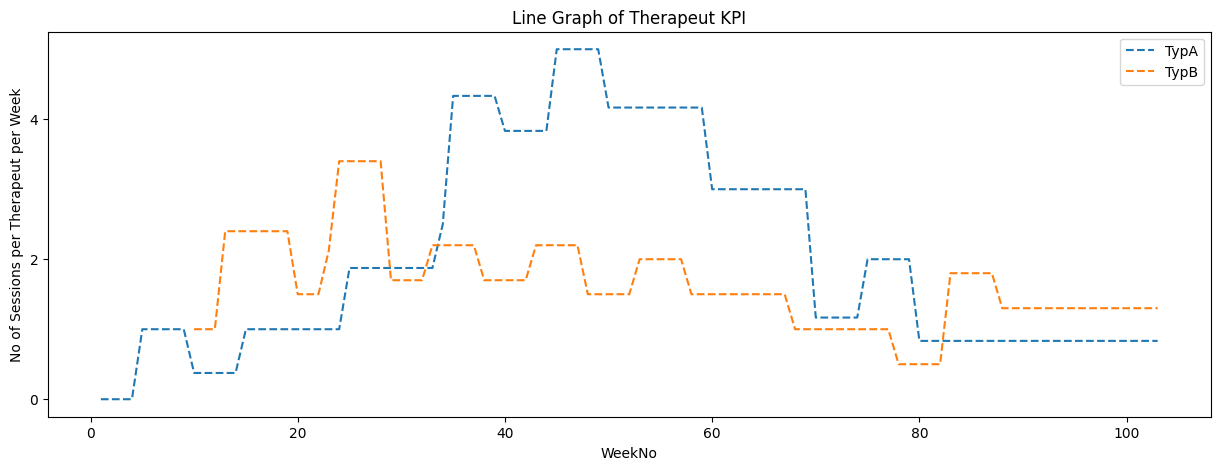

In [114]:
Plot_LineGraph_of_Dataframe(dfTherapeutKPI, "Line Graph of Therapeut KPI", "WeekNo", "No of Sessions per Therapeut per Week")



---
### **OLD CODE - WORK IN PROGRESS**
---



In [117]:
dfSBx.describe()

,Total,3_1,3_2,3_3,3_4,3_5,13_1,13_2,13_3,13_4,...,83_4,83_5,83_6,83_7,83_8,83_9,83_10,83_11,83_12,83_13
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,...,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,13.394231,0.336538,0.336538,0.336538,0.336538,0.336538,0.336538,0.336538,0.336538,0.336538,...,0.201923,0.201923,0.201923,0.201923,0.201923,0.201923,0.201923,0.201923,0.201923,0.201923
std,5.424537,0.474814,0.474814,0.474814,0.474814,0.474814,0.474814,0.474814,0.474814,0.474814,...,0.403379,0.403379,0.403379,0.403379,0.403379,0.403379,0.403379,0.403379,0.403379,0.403379
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
